# ****Spam Message Classification using LSTM****

### 1.Import the Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

****2. Reading the spam dataset****

In [ ]:
data=pd.read_csv("spam.csv",encoding="latin")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

****3. Drop the unnamed Columns****

In [ ]:
data=data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

****4. Renaming Column names sensible****

In [ ]:
data=data.rename(
{
    "v1":"Category",
    "v2":"Message"
},
    axis=1
)

In [ ]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


****5. Check for null values in dataset****

In [ ]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


****6.Creating a new column for Message Lengths****

In [ ]:
data["Message Length"]=data["Message"].apply(len)

****7. Histogram plotting of Message Lengths of Spam and Non-spam messages****

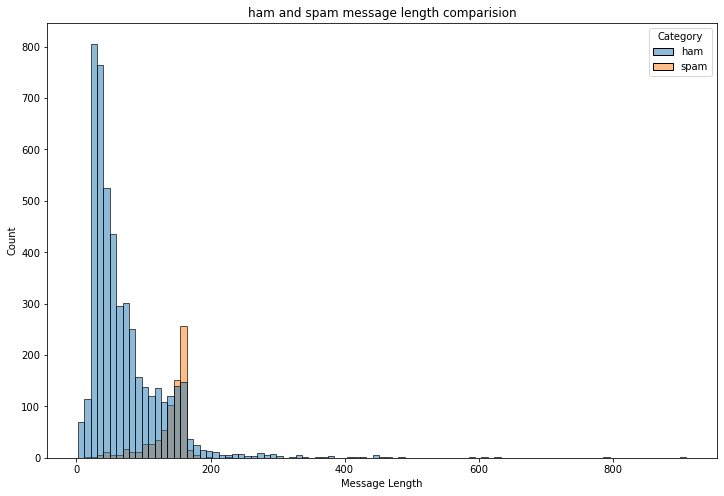

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.histplot(
    x=data["Message Length"],
    hue=data["Category"]
)
plt.title("ham and spam message length comparision")
plt.show()

In [ ]:
ham_des=data[data["Category"]=="ham"]["Message Length"].describe()
spam_des=data[data["Category"]=="spam"]["Message Length"].describe()

print("Ham Messege Length Description:\n",ham_des)
print("Spam Message Length Description:\n",spam_des)

Ham Messege Length Description:
 count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: Message Length, dtype: float64
Spam Message Length Description:
 count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: Message Length, dtype: float64


In [ ]:
data.describe(include="all")

,Category,Message,Message Length
count,5572,5572,5572.000000
unique,2,5169,NaN
top,ham,"Sorry, I'll call later",NaN
freq,4825,30,NaN
mean,NaN,NaN,80.118808
std,NaN,NaN,59.690841
min,NaN,NaN,2.000000
25%,NaN,NaN,36.000000
50%,NaN,NaN,61.000000
75%,NaN,NaN,121.000000


****8. Visualizing count of messages of Spam and Non Spam****

In [ ]:
data["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

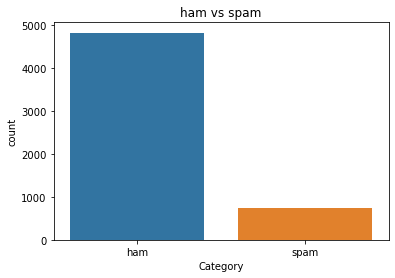

In [ ]:
sns.countplot(
    data=data,
    x="Category"
)
plt.title("ham vs spam")
plt.show()

In [ ]:
ham_count=data["Category"].value_counts()[0]
spam_count=data["Category"].value_counts()[1]

total_count=data.shape[0]

print("Ham contains:{:.2f}% of total data.".format(ham_count/total_count*100))
print("Spam contains:{:.2f}% of total data.".format(spam_count/total_count*100))

Ham contains:86.59% of total data.
Spam contains:13.41% of total data.


****9. Undersampling to Genralize Model and Balance Spam and Ham quantities in dataset****

In [ ]:
minority_len=len(data[data["Category"]=="spam"])
majority_len=len(data[data["Category"]=="ham"])
minority_indices=data[data["Category"]=="spam"].index
majority_indices=data[data["Category"]=="ham"].index
random_majority_indices=np.random.choice(
    majority_indices,
    size=minority_len,
    replace=False
)

undersampled_indices=np.concatenate([minority_indices,random_majority_indices])
df=data.loc[undersampled_indices]
df=df.sample(frac=1)
df=df.reset_index()
df=df.drop(
    columns=["index"],
)


In [ ]:
df.shape

(1494, 3)

In [ ]:
df["Category"].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

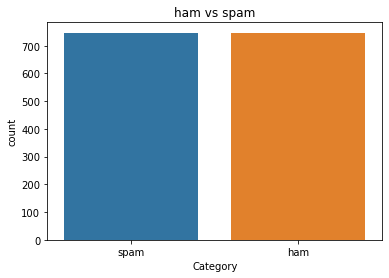

In [ ]:
sns.countplot(
    data=df,
    x="Category"
)
plt.title("ham vs spam")
plt.show()

In [ ]:
df.head()

,Category,Message,Message Length
0,spam,YOU VE WON! Your 4* Costa Del Sol Holiday or å...,164
1,spam,Fantasy Football is back on your TV. Go to Sky...,162
2,ham,Ffffffffff. Alright no way I can meet up with ...,57
3,ham,I can ask around but there's not a lot in term...,63
4,spam,Last chance 2 claim ur å£150 worth of discount...,162


****10. Binary Encoding of Spam and Ham ****

In [ ]:
df["Label"]=df["Category"].map(
    {
        "ham":0,
        "spam":1
    }
)

In [ ]:
df.head()

,Category,Message,Message Length,Label
0,spam,YOU VE WON! Your 4* Costa Del Sol Holiday or å...,164,1
1,spam,Fantasy Football is back on your TV. Go to Sky...,162,1
2,ham,Ffffffffff. Alright no way I can meet up with ...,57,0
3,ham,I can ask around but there's not a lot in term...,63,0
4,spam,Last chance 2 claim ur å£150 worth of discount...,162,1


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

In [ ]:
corpus=[]
for message in df["Message"]:
    message=re.sub("[^a-zA-Z]"," ",message)
    message=message.lower()
    message=message.split()
    message=[stemmer.stem(words)
            for words in message
             if words not in set(stopwords.words("english"))
            ]
    message=" ".join(message)
    corpus.append(message)

****12. Perform One Hot on Corpus****

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size=10000

oneHot_doc=[one_hot(words,n=vocab_size)
           for words in corpus
           ]

In [ ]:
df["Message Length"].describe()

count    1494.000000
mean      104.884203
std        55.292784
min         4.000000
25%        51.000000
50%       119.500000
75%       153.000000
max       632.000000
Name: Message Length, dtype: float64

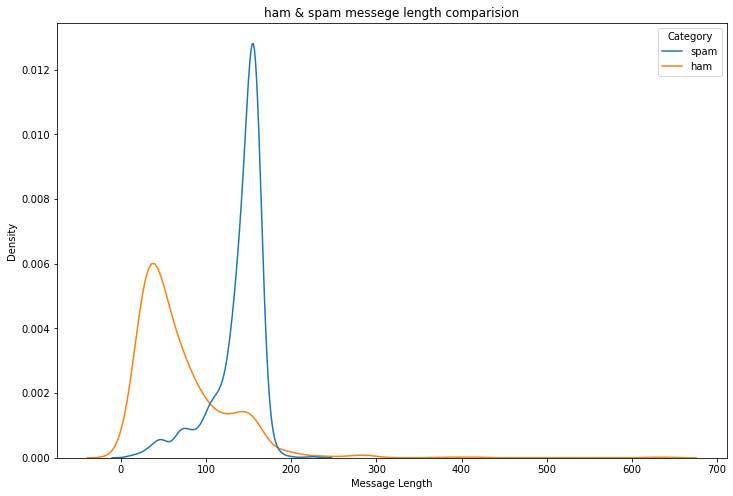

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.kdeplot(
    x=df["Message Length"],
    hue=df["Category"]
)
plt.title("ham & spam messege length comparision")
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentence_len=200
embedded_doc=pad_sequences(
    oneHot_doc,
    maxlen=sentence_len,
    padding="pre"
)

In [ ]:
extract_features=pd.DataFrame(
    data=embedded_doc
)
target=df["Label"]

In [ ]:
df_final=pd.concat([extract_features,target],axis=1)

In [ ]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Label
0,0,0,0,0,0,0,0,0,0,0,...,9316,9499,6889,477,206,7357,23,9896,7028,1
1,0,0,0,0,0,0,0,0,0,0,...,5391,6373,9486,4865,3359,5796,466,770,5189,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2114,9832,7920,6305,6380,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6994,1831,5182,1844,2419,0
4,0,0,0,0,0,0,0,0,0,0,...,7295,2127,5391,5967,1337,4171,8363,8588,3514,1


**13. Splitting Dependent and Independent Variables**

In [ ]:
X=df_final.drop("Label",axis=1)
y=df_final["Label"]

****14.split data to train, test and Validation****

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_trainval,X_test,y_trainval,y_test=train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.15
)


In [ ]:
X_train,X_val,y_train,y_val=train_test_split(
    X_trainval,
    y_trainval,
    random_state=42,
    test_size=0.15
)

****15.Building Model****

In [ ]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential


In [ ]:
model=Sequential()

In [ ]:
feature_num=100
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=feature_num,
        input_length=sentence_len
    )
)
model.add(
    LSTM(
    units=128
    )
)

model.add(
    Dense(
        units=1,
        activation="sigmoid"
    )
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 100)          1000000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,117,377
Trainable params: 1,117,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(
    learning_rate=0.001
    ),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

****16. Model Fitting****

In [ ]:
history=model.fit(
    X_train,
    y_train,
    validation_data=(
        X_val,
        y_val
    ),
    epochs=10
)

Epoch 1/10
34/34 [==============================] - 5s 112ms/step - loss: 0.5192 - accuracy: 0.7236 - val_loss: 0.3905 - val_accuracy: 0.8272
Epoch 2/10
34/34 [==============================] - 3s 103ms/step - loss: 0.1767 - accuracy: 0.9453 - val_loss: 0.2096 - val_accuracy: 0.9215
Epoch 3/10
34/34 [==============================] - 4s 103ms/step - loss: 0.0542 - accuracy: 0.9833 - val_loss: 0.1630 - val_accuracy: 0.9476
Epoch 4/10
34/34 [==============================] - 3s 103ms/step - loss: 0.0266 - accuracy: 0.9926 - val_loss: 0.1653 - val_accuracy: 0.9529
Epoch 5/10
34/34 [==============================] - 4s 104ms/step - loss: 0.0111 - accuracy: 0.9963 - val_loss: 0.1448 - val_accuracy: 0.9581
Epoch 6/10
34/34 [==============================] - 3s 100ms/step - loss: 0.0077 - accuracy: 0.9981 - val_loss: 0.1757 - val_accuracy: 0.9476
Epoch 7/10
34/34 [==============================] - 3s 103ms/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.1946 - val_accuracy: 0.9476
Epoch 

In [ ]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

8/8 [==============================] - 0s 25ms/step


In [ ]:
model.save('Spam_SMS_classifier.h5')

**17. Testing the Model**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
score=accuracy_score(y_test,y_pred)
print("Test Score:{:.2f}%".format(score*100))

Test Score:96.44%


In [ ]:
conmax=confusion_matrix(y_test,y_pred)
conmax

array([[114,   4],
       [  4, 103]], dtype=int64)